# 1.3 EV on a Parabolic Landscape
We consider a simple geno/phenospace: each individual $x$ of the population is a real number.

The objective fitness function is $F(x) = 50 - x^2$.

Population size: 10.

There are two kind of mutations, +1.0 and -1.0. At each generation, one individual is randomly selected to be parent, and a new individual will born. The son will be almost identical to the parent, but will present one of the two possibile mutations.

Eventually, a candidate will be selected from the initial population, and the one with the highest fitness between the candidate and the son previously generated will be kept. The other one will extinguish.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fitness(x):
    return 50 - x*x

def mutate(x):
    mutation = [-1.0, 1.0][np.random.randint(0, 2)]
    return x + mutation

def new_generation(population):
    # Parent selection by uniform distribution
    parent_idx = np.random.randint(pop_size)
    parent = population[parent_idx]
    
    # Son generation by mutating the parent
    son = mutate(parent)
    son_fitness = fitness(son)
    
    # Candidate selection by uniform distribution
    candidate_idx = np.random.randint(pop_size)
    candidate = population[candidate_idx]
    candidate_fitness = fitness(candidate)

    # Only the fittest among the candidate and the newborn is selected to survive
    population[candidate_idx] = [candidate, son][int(candidate_fitness < son_fitness)]
    
    return population

def print_population(population, fitness):
    print("#\tIndividual\tFitness")
    for i in range(population.shape[0]):
        print("{}\t{:.2f}\t\t{:.2f}".format(i, population[i], fitness[i]))

In [3]:
pop_size = 10

# initialize the population: generation 0
population = np.random.uniform(low=-100, high=100, size=(pop_size,))
population_fitness = fitness(population)

print_population(population, population_fitness)

#	Individual	Fitness
0	-64.80		-4148.49
1	-58.49		-3371.50
2	-19.98		-349.36
3	28.34		-753.37
4	-83.06		-6848.45
5	36.83		-1306.48
6	-31.07		-915.56
7	31.72		-955.89
8	-58.24		-3341.42
9	91.14		-8256.10


In [4]:
# generation 1
population = new_generation(population)
population_fitness = fitness(population)

print_population(population, population_fitness)

#	Individual	Fitness
0	-64.80		-4148.49
1	-58.49		-3371.50
2	-19.98		-349.36
3	28.34		-753.37
4	-83.06		-6848.45
5	36.83		-1306.48
6	-31.07		-915.56
7	31.72		-955.89
8	-30.07		-854.42
9	91.14		-8256.10


In [5]:
best_individual_per_gen = [np.max(fitness(population))]
for i in range(500):
    population = new_generation(population)
    best_individual_per_gen += [np.max(fitness(population))]
    
population_fitness = fitness(population)
print_population(population, population_fitness)

#	Individual	Fitness
0	0.02		50.00
1	0.02		50.00
2	0.02		50.00
3	0.02		50.00
4	0.02		50.00
5	0.02		50.00
6	0.02		50.00
7	-0.98		49.03
8	0.02		50.00
9	0.02		50.00


The population has converged to the maximum fitness on the landscape.

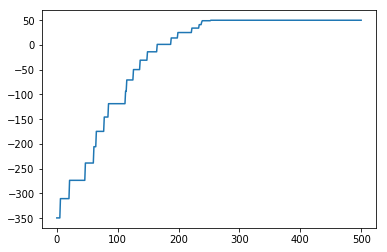

In [6]:
plt.plot(best_individual_per_gen);